In [35]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

import nltk 
import random 
from nltk.tokenize import word_tokenize
nltk.download('punkt') 
nltk.download('stopwords') 
nltk.download('wordnet') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
import urllib.request as urllib2
import csv
import matplotlib.pyplot as plt
from nltk import FreqDist
import pandas as pd
url = 'https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv'
response = urllib2.urlopen(url)
df = pd.read_csv(response,delimiter='\t',encoding='utf-8')
df.head()


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [37]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,106926,5646,postapocalyptic setting,2
1,7099,286,rather cold-blooded comedy,1
2,86959,4508,told what actually happened as if it were the ...,1
3,15862,681,glorious spectacle,4
4,142469,7730,"deceptively simple ,",3


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(df ['Phrase'], df ['Sentiment'], test_size=0.3, random_state=2003)

documents=[]
X_train = np.array(X_train.values.tolist())
Y_train = np.array(Y_train.values.tolist())


for i in range(len(X_train)):
  documents.append([list(word_tokenize(X_train[i])), Y_train[i]]) 

X_test = np.array(X_test.values.tolist())
Y_test = np.array(Y_test.values.tolist())
for i in range(len(X_test)):
  documents.append([list(word_tokenize(X_test[i])), Y_test[i]]) 

documents[0]

[['to',
  'sustain',
  'a',
  'reasonable',
  'degree',
  'of',
  'suspense',
  'on',
  'its',
  'own'],
 2]

In [0]:
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer 
porter = PorterStemmer() 
lancaster=LancasterStemmer() 
wordnet_lemmatizer = WordNetLemmatizer() 
stopwords_en = stopwords.words("english") 
punctuations="?:!.,;'\"-()"
remove_stopwords = True
useStemming = True
useLemma = False
removePuncs = True


In [40]:
for l in range(len(documents)):                    
  label = documents[l][1]                         
  tmpReview = []                                  
  for w in documents[l][0]:                       
    newWord = w                                    
    if remove_stopwords and (w in stopwords_en):  
      continue                                     
    if removePuncs and (w in punctuations):      
      continue                                    
    if useStemming: 
      newWord = lancaster.stem(newWord)  
    if useLemma: 
      newWord = wordnet_lemmatizer.lemmatize(newWord) 
    tmpReview.append(newWord)                      
  documents[l] = (tmpReview, label)             
  documents[l] = (' '.join(tmpReview), label) 

print(documents[0])

('sustain reason degr suspens', 2)


In [41]:
df = pd.DataFrame(documents, columns=['text', 'sentiment']) 
df.head()



,text,sentiment
0,sustain reason degr suspens,2
1,lik igby,2
2,grumpy,2
3,wide-awak way,3
4,an unho mess,0


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],  df['sentiment'], test_size=0.3, random_state=2003)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from keras.utils import to_categorical

vectorizer = TfidfVectorizer(max_features = 2500)
X = vectorizer.fit_transform(df["text"]) 
Y = df['sentiment'] 
 
X_train = vectorizer.transform(X_train).toarray()
Y_train = Y_train 
X_test = vectorizer.transform(X_test).toarray()
Y_test = Y_test


In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K

In [0]:

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [0]:

num_classes = 5


In [47]:
X_train.shape

(109242, 2500)

In [0]:
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


In [0]:
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Input, Dense, Embedding, Flatten
from keras.layers import SpatialDropout1D
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.models import Sequential

from matplotlib import pyplot

In [0]:

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5,
                 activation='relu',
                 input_shape=(2500,1)))
model.add(Conv1D(128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=1))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))


In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy',f1_m,precision_m, recall_m])

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [0]:

history=model.fit(X_train, Y_train,
          batch_size=256,
          epochs=10)
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['f1_m'])
pyplot.plot(history.history['precision_m'])
pyplot.plot(history.history['recall_m'])
pyplot.show()
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Precision:', score[3])
print('F1 measure:', score[2])
print('Recall:', score[4])


Epoch 1/10
109242/109242 [==============================] - 65s 595us/step - loss: 0.8131 - acc: 0.6757 - f1_m: 0.6566 - precision_m: 0.7191 - recall_m: 0.6043
Epoch 2/10
109242/109242 [==============================] - 65s 594us/step - loss: 0.8117 - acc: 0.6755 - f1_m: 0.6576 - precision_m: 0.7198 - recall_m: 0.6055
Epoch 3/10
 89600/109242 [=======================>......] - ETA: 11s - loss: 0.8078 - acc: 0.6779 - f1_m: 0.6596 - precision_m: 0.7217 - recall_m: 0.6076

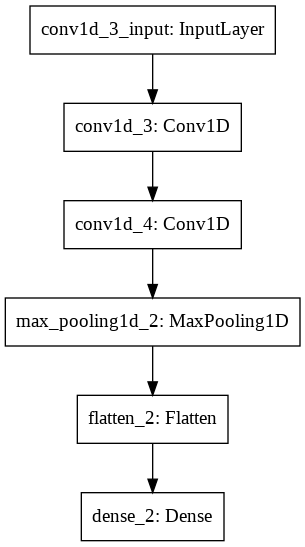

In [54]:
from keras.utils import plot_model
plot_model(model)

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
model.save('/content/drive/My Drive/1111407_12.h5')